# Importing Library 

In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Processing on the data

In [42]:
os.listdir()

['.ipynb_checkpoints',
 'Marketing Analysis.ipynb',
 'marketing.csv',
 'marketing_new.csv']

### the next way is to import data and be care about date

In [43]:
mark = pd.read_csv('marketing.csv',parse_dates=['date_served','date_subscribed','date_canceled'])
mark.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [44]:
mark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [45]:
mark['converted'] = mark['converted'].astype('bool')

In [46]:
mark['converted'].dtype

dtype('bool')

In [47]:
mark['marketing_channel'].unique()

array(['House Ads', 'Push', 'Facebook', 'Instagram', 'Email', nan],
      dtype=object)

In [48]:
mark['is_hise_ads'] =np.where(mark['marketing_channel']=='House Ads',True,False)

In [49]:
mark.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_hise_ads
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True


In [50]:
mark['is_hise_ads'].value_counts()

False    5304
True     4733
Name: is_hise_ads, dtype: int64

#### du to the way pandas stores data , in large dataset, it can be computationally inefficient to store columns of strings

In [51]:
channnel_dict = {'House Ads':1,'Instagram':2,'Facebook':3,'Email':4,'Push':5}

In [52]:
mark['channel_code'] = mark['marketing_channel'].map(channnel_dict)

In [53]:
mark['is_house_ads']=mark['is_hise_ads']

In [54]:
mark.drop('is_hise_ads',axis=1)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_house_ads
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,4.0,False
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,4.0,False
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,2.0,False
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,4.0,False


In [55]:
from datetime import datetime as dt
mark['date_served']=pd.to_datetime(mark['date_served'])

In [56]:
mark['day_served']= mark['date_served'].dt.dayofweek

In [57]:
mark.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_hise_ads,channel_code,is_house_ads,day_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0


### aggregate user that see ads

In [58]:
daily_user = mark.groupby('date_served')['user_id'].nunique()
print(daily_user)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


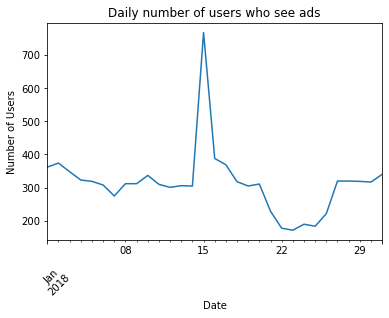

In [59]:
daily_user.plot()
plt.title('Daily number of users who see ads')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.xticks(rotation = 45)
plt.show()

In [60]:
the_way_of_mark = mark.groupby('marketing_channel')['user_id'].nunique()
print(the_way_of_mark)

marketing_channel
Email         553
Facebook     1758
House Ads    3968
Instagram    1740
Push          972
Name: user_id, dtype: int64


### here we will see what is the reason of the big seen in day 15

In [61]:
da15 = mark.loc[mark['date_served']=='2018-01-15']

In [62]:
count_dal5 = da15.groupby('marketing_channel')['user_id'].nunique()
print(count_dal5)

marketing_channel
Email        407
Facebook      67
House Ads    205
Instagram     64
Push          36
Name: user_id, dtype: int64


## conversion rate = number of people of who conver / total number of people who marketed to

In [63]:
subscribers = mark[mark['converted']==True]['user_id'].nunique()
print(subscribers)

1030


### calaculate the total number of people we marketed to 

In [64]:
total = mark['user_id'].nunique()
print(total)

7309


### calcualte conversion rate

In [65]:
conversion_rate = (subscribers/total)*100
print(round(conversion_rate),'%')

14 %


# rateined rate = people who remain subscribed / total number of people who converted

In [66]:
ratained = mark[mark['is_retained']==True]['user_id'].nunique()
subscribers = mark[mark['converted']==True]['user_id'].nunique()
retention = (ratained/subscribers)*100
print(retention,'%')

65.8252427184466 %


# we can segment the user by many segmentation like age gender or channels

#### here we will use audience who use house ads 

In [67]:
house_ads = mark[mark['marketing_channel']=='House Ads']
house_ads.shape

(4733, 16)

In [68]:
#we calculate the conversion rate and ratention rate also for this segment
total = house_ads['user_id'].nunique()
ratained = house_ads[house_ads['is_retained']==True]['user_id'].nunique()
print(ratained)
subscribers = house_ads[house_ads['converted']==True]['user_id'].nunique()
print(subscribers)
conversion_rate = (subscribers/total)*100
print(round(conversion_rate),'%')
print('+++++++++++++++++++++++++++++++++++++++++++')
retention = (ratained/subscribers)*100
print(retention,'%')

378
298
8 %
+++++++++++++++++++++++++++++++++++++++++++
126.84563758389262 %


In [69]:
retained_group = mark[mark['is_retained']==True].groupby('marketing_channel')['user_id'].nunique()
subscribes_group = mark[mark['converted']==True].groupby('marketing_channel')['user_id'].nunique()

In [70]:
cahnnel_retantion_rate = (retained_group/subscribes_group)*100
cahnnel_retantion_rate

marketing_channel
Email         74.331551
Facebook      95.475113
House Ads    126.845638
Instagram     85.344828
Push         123.376623
Name: user_id, dtype: float64

In [71]:
marketing = mark

In [72]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted']==True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 13.13 %


In [73]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])\
                                  ['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True]\
                       .groupby(['language_displayed'])\
                       ['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [74]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


Text(0, 0.5, 'Conversion Rate (%)')

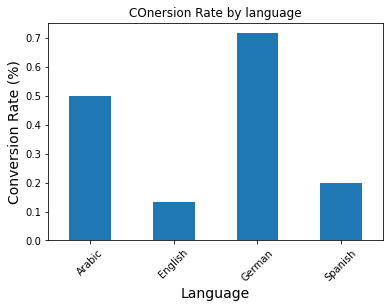

In [75]:
language_conversion_rate.plot(kind='bar')
plt.title('COnersion Rate by language')
plt.xlabel('Language',size=14)
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate (%)',size=14)

In [76]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_hise_ads,channel_code,is_house_ads,day_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0


In [77]:
total = marketing.groupby('date_subscribed')['user_id'].nunique()
retained = marketing[marketing['is_retained']==True].groupby('date_subscribed')['user_id'].nunique()
daily_retention_rate = retained/total
daily_retention_rate

date_subscribed
2018-01-01    0.777778
2018-01-02    0.702703
2018-01-03    0.729730
2018-01-04    0.500000
2018-01-05    0.575000
2018-01-06    0.756757
2018-01-07    0.526316
2018-01-08    0.638889
2018-01-09    0.675000
2018-01-10    0.682927
2018-01-11    0.615385
2018-01-12    0.391304
2018-01-13    0.500000
2018-01-14    0.615385
2018-01-15    0.714286
2018-01-16    0.701923
2018-01-17    0.616279
2018-01-18    0.733333
2018-01-19    0.684211
2018-01-20    0.809524
2018-01-21    0.761905
2018-01-22    0.772727
2018-01-23    0.714286
2018-01-24    0.652174
2018-01-25    0.565217
2018-01-26    0.800000
2018-01-27    0.571429
2018-01-28    0.666667
2018-01-29    0.750000
2018-01-30    0.714286
2018-01-31    0.666667
Name: user_id, dtype: float64

In [78]:
#we make this step to can plot the output
daily_retention_rate = pd.DataFrame(daily_retention_rate.reset_index())
daily_retention_rate.columns=['date_subscribed','retention_rate']
daily_retention_rate

,date_subscribed,retention_rate
0,2018-01-01,0.777778
1,2018-01-02,0.702703
2,2018-01-03,0.729730
3,2018-01-04,0.500000
4,2018-01-05,0.575000
5,2018-01-06,0.756757
6,2018-01-07,0.526316
7,2018-01-08,0.638889
8,2018-01-09,0.675000
9,2018-01-10,0.682927


Text(0, 0.5, 'Date')

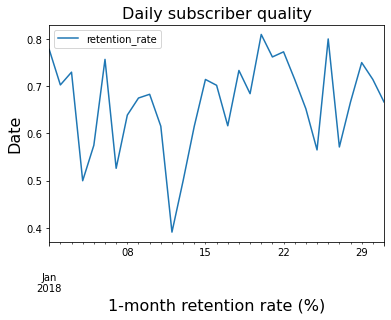

In [79]:
daily_retention_rate.plot('date_subscribed','retention_rate')
plt.title('Daily subscriber quality',size= 16)
plt.xlabel('1-month retention rate (%)',size = 16)
plt.ylabel('Date', size = 16)

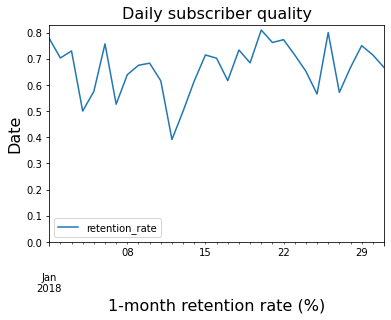

In [80]:
daily_retention_rate.plot('date_subscribed','retention_rate')
plt.title('Daily subscriber quality',size= 16)
plt.xlabel('1-month retention rate (%)',size = 16)
plt.ylabel('Date', size = 16)
plt.ylim(0)#to make the rate start from 0 and increase by one every step 
plt.show()

In [81]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_hise_ads,channel_code,is_house_ads,day_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0


In [82]:
language = marketing.groupby(['date_served','language_preferred'])['user_id'].count()
language = pd.DataFrame(language.unstack(level=1))
language.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,355.0,5.0,11.0
2018-01-02,4.0,397.0,6.0,10.0
2018-01-03,3.0,374.0,3.0,8.0
2018-01-04,2.0,318.0,2.0,14.0
2018-01-05,1.0,314.0,2.0,14.0


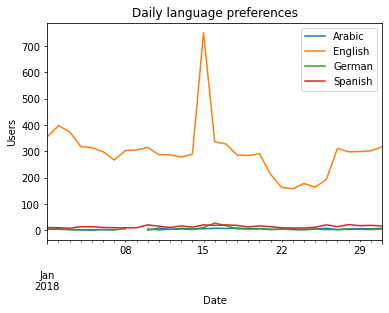

In [83]:
language.plot()
plt.title('Daily language preferences')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc='upper right',labels = language.columns.values)
plt.show()

In [84]:
language_age = marketing.groupby(['language_preferred','age_group'])['user_id'].count()
language_age = pd.DataFrame(language_age.unstack(level=1))
language_age.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,19,26,19,19,19,21,22
English,1421,1560,1442,1251,1260,1240,1101
German,31,29,35,16,19,25,12
Spanish,68,67,72,69,55,67,52


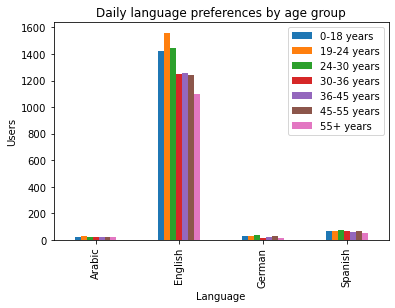

In [85]:
language_age.plot(kind = 'bar')
plt.title('Daily language preferences by age group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc='upper right',labels = language_age.columns.values)
plt.show()

# building a retention function

In [86]:
def retention_rate(dataframe,column_names):
    '''group by column_named and calculate retention
       group by column_named and caluclate concersion
       return retention rate
    '''
    retained = dataframe[dataframe['is_retained']==True].groupby(column_names)['user_id'].nunique()
    converted = dataframe[dataframe['converted']== True].groupby(column_names)['user_id'].nunique()
    retention_rate = retained/converted
    
    return retention_rate

In [87]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [88]:
help(retention_rate)

Help on function retention_rate in module __main__:

retention_rate(dataframe, column_names)
    group by column_named and calculate retention
    group by column_named and caluclate concersion
    return retention rate



In [89]:
daily_retention = retention_rate(marketing,['date_subscribed','subscribing_channel'])
daily_retention = pd.DataFrame(daily_retention)
print(daily_retention)
daily_retention = pd.DataFrame(daily_retention.unstack(level=1))
print(daily_retention)

                                      user_id
date_subscribed subscribing_channel          
2018-01-01      Email                1.000000
                Facebook             0.875000
                House Ads            0.687500
                Instagram            0.750000
                Push                 1.000000
...                                       ...
2018-01-31      Email                1.000000
                Facebook             0.833333
                House Ads            0.500000
                Instagram            0.666667
                Push                 0.500000

[155 rows x 1 columns]
                      user_id                                        
subscribing_channel     Email  Facebook House Ads Instagram      Push
date_subscribed                                                      
2018-01-01           1.000000  0.875000  0.687500  0.750000  1.000000
2018-01-02           0.750000  1.000000  0.588235  0.625000  1.000000
2018-01-03                Na

In [90]:
def plotting_conv(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily'+ column + ' retention rate\n',size = 16)
        plt.ylabel('Retention rate(%)', size = 14)
        plt.xlabel('Date' ,size=14)
        plt.show()
        

In [91]:
marketing.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'is_hise_ads', 'channel_code', 'is_house_ads',
       'day_served'],
      dtype='object')

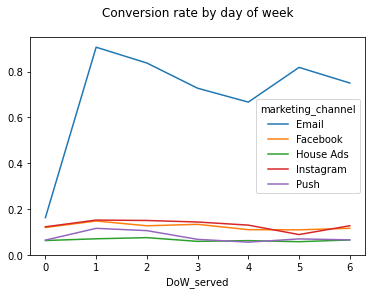

In [92]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

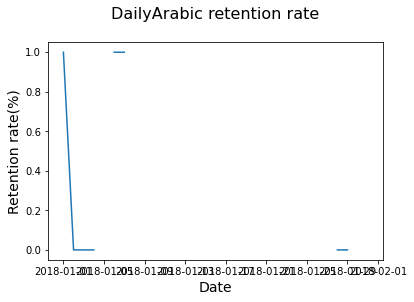

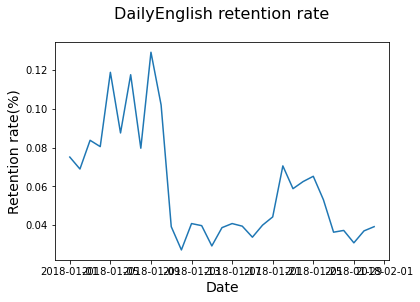

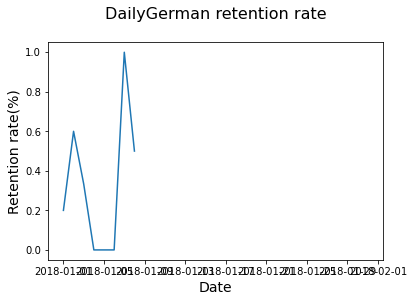

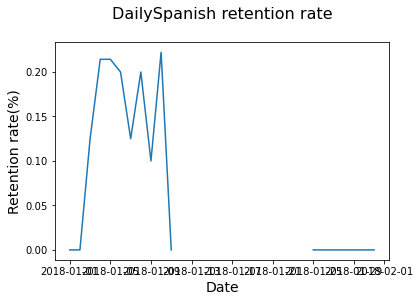

In [93]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads,['date_served','language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

In [94]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    'Yes', 
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results

C:\Users\Shaheeen\AppData\Local\Temp/ipykernel_11684/1543954123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


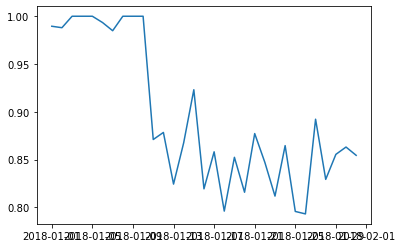

In [95]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

In [96]:
marketing

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_hise_ads,channel_code,is_house_ads,day_served,DoW_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,1.0,True,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,False,4.0,False,2.0,2.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,False,4.0,False,2.0,2.0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,False,2.0,False,4.0,4.0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,False,4.0,False,2.0,2.0


# A/B test

#### Test allocation

In [99]:
email = marketing[marketing['marketing_channel']=='Email']
allocation = email.groupby('variant')['user_id'].nunique()
allocation

variant
control            270
personalization    284
Name: user_id, dtype: int64

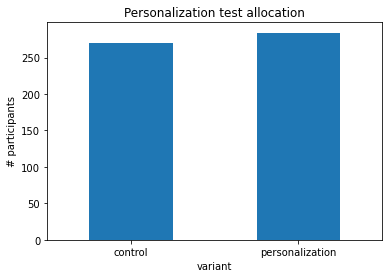

In [98]:
allocation.plot(kind='bar')
plt.title('Personalization test allocation')
plt.xticks(rotation= 0)
plt.ylabel('# participants')
plt.show()

In [103]:
#group by user_id and variant
subscribers = email.groupby(['user_id','variant'])['converted'].max()
subscribers = pd.DataFrame(subscribers.unstack(level=1))
subscribers

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True
...,...,...
a100007288,True,NaN
a100007289,True,NaN
a100007290,True,NaN


In [101]:
control = subscribers['control'].dropna()

In [102]:
personalization = subscribers['personalization'].dropna()